# One-dimensional Ising model with spin-$\frac{1}{2}$ particles

The Hamiltonian for a system of $ N $ spin-$\frac{1}{2}$ particles on a one-dimensional lattice is given by:

$$
\hat{H} = \lambda \sum_{i=1}^{N} \sigma_z^{(i)} + \sum_{i=1}^{N-1} \sigma_x^{(i)} \sigma_x^{(i+1)}
$$

where $ \sigma_x $ and $ \sigma_z $ are the Pauli matrices and $ \lambda $ is the interaction strength.

1. Write a program to compute the $ N \times N $ matrix representation of the Hamiltonian $ \hat{H} $ for different $ N $.

2. Diagonalize $ \hat{H} $ for different $ N = 1, \ldots, N_{\text{max}} $ and $ \lambda \in [0, -3] $. What is the largest $ N_{\text{max}} $ you can reach?.

3. Plot the first $ k $ levels as a function of $ \lambda $ for different $ N $ and comment on the spectrum.

**Import zone**

In [1]:
import ising_model as im
import phase_transition_functions as ptf

import numpy as np

**Energy gaps analysis**

In [2]:
N_vals = np.arange(4, 15, 1)
l_vals = np.linspace(-0.3, 2, 50)
k = 3

eigenvalues, _ = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=4 ...
Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


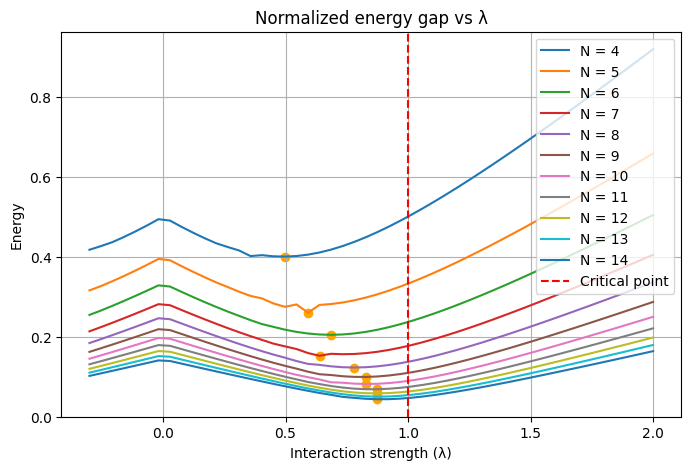

In [3]:
gaps, ls = ptf.plot_energy_gaps(N_vals, l_vals, eigenvalues, no_deg=True)

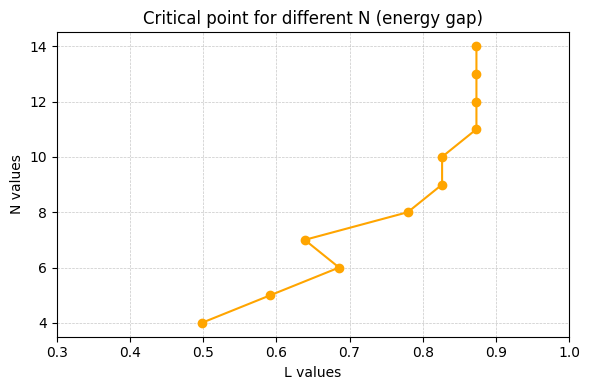

In [4]:
ptf.plot_pt_gap(N_vals, ls)

**Magnetization**

In [5]:
N_vals = np.arange(2, 15, 1)
l_vals = np.logspace(-2, 2, 20)
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=2 ...
Diagonalizing Ising Hamiltonian with N=3 ...
Diagonalizing Ising Hamiltonian with N=4 ...
Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


/home/kallo27/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kallo27/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


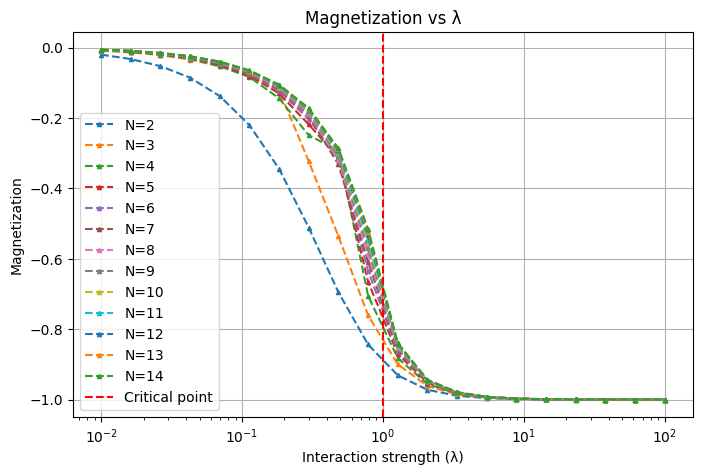

In [6]:
ptf.plot_magnetization(N_vals, l_vals, eigenvectors)

In [25]:
N_vals = np.arange(7, 15, 1)
l_vals = np.logspace(-1, 1, 40)
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


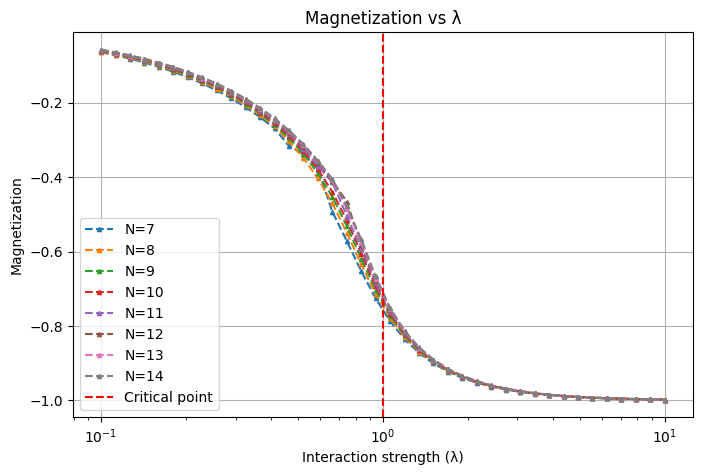

In [26]:
ptf.plot_magnetization(N_vals, l_vals, eigenvectors)

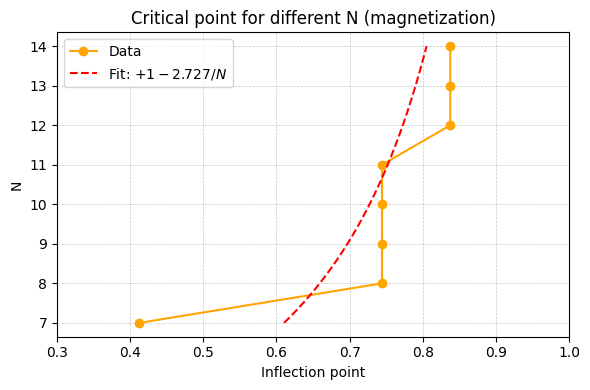

In [27]:
ptf.plot_pt_magnetization(N_vals, l_vals, eigenvectors)

**Entropy**

In [10]:
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def rdm(psi, N, D, keep_indices):
  """
  rdm :
    Computes the reduced density matrix of a quantum state by tracing out the 
    degrees of freedom of the environment.

  Parameters
  ----------
  psi : np.ndarray
    Wavefunction of the quantum many-body system, represented as a complex vector of 
    size D^N.
  N : int
    Number of subsystems.
  D : int
    Dimension of each subsystem.
  keep_indices : list of int
    Indices of the sites to retain in the subsystem (all other sites are traced out).

  Returns
  -------
  reduced_density_matrix : np.ndarray
    Reduced density matrix for the subsystem specified by keep_indices, which is a 
    square matrix of size (D^len(keep_indices), D^len(keep_indices)).
  """
  # Check correct values for 'keep_indices'
  if not all(0 <= idx < N for idx in keep_indices):
    raise ValueError(f"'keep_indices' must be valid indices within range(n_sites), got {keep_indices}")
    
  # Compute subsystem and environment dimensions
  n_keep = len(keep_indices)
  subsystem_dim = D ** n_keep
  env_dim = D ** (N - n_keep)

  # Reshape the wavefunction into a tensor
  psi_tensor = psi.reshape([D] * N)

  # Reorder the axes to group subsystem (first) and environment (second)
  all_indices = list(range(N))
  env_indices = [i for i in all_indices if i not in keep_indices] # complement of keep_indices
  reordered_tensor = np.transpose(psi_tensor, axes=keep_indices + env_indices)

  # Partition into subsystem and environment (reshape back)
  psi_partitioned = reordered_tensor.reshape((subsystem_dim, env_dim))

  # Compute the reduced density matrix
  rdm = np.dot(psi_partitioned, psi_partitioned.conj().T)

  return rdm

def von_neumann_entropy(state_vector, N, D, keep_indices):
  """
  Computes the Von Neumann entropy for a given quantum state vector.

  Parameters
  ----------
  state_vector : np.ndarray
    The quantum state vector of the entire system, assumed to be normalized.
  N : int
    Number of subsystems.
  D : int
    Dimension of each subsystem.
  keep_indices : list of int
    Indices of the sites to retain in the subsystem.

  Returns
  -------
  entropy : float
    The Von Neumann entropy of the subsystem.
  """
  # Compute the reduced density matrix
  reduced_density_matrix = rdm(state_vector, N, D, keep_indices)

  # Compute eigenvalues of the reduced density matrix
  eigenvalues = np.linalg.eigvalsh(reduced_density_matrix)

  # Filter out small eigenvalues to avoid log(0)
  non_zero_eigenvalues = eigenvalues[eigenvalues > 1e-12]

  # Compute the Von Neumann entropy
  entropy = -np.sum(non_zero_eigenvalues * np.log(non_zero_eigenvalues))

  return entropy

def plot_entropy(N_values, l_values, eigenvectors):
  """
  plot_entropy :
    Plot the Von Neumann entropy as a function of l for different N.
  
  Parameters
  ----------
  N_values : list of int
    Values of N, number of spins in the system.
  l_values : list of float
    Values of l, interaction strength.
  eigenvecttors : np.ndarray
    Precomputed eigenvectors for every (N, l).
  
  Returns
  ----------
  None
  """  
  plt.figure(figsize=(8, 5))
    
  # Loop over the values of N (many plots)
  for N in N_values:    
    Ss = []
    # Loop over the first k levels
    for l in l_values:
      S = von_neumann_entropy(eigenvectors[(N, l)][0], N, 2, list(range(N // 2)))
      Ss.append(S)

    plt.plot(l_values, Ss, marker='^', linestyle='--', label = f"N={N}", markersize=3)
  
  plt.axvline(x = 1, linestyle="--", color = "red", label="Critical point")
      
  # Plot formatting
  plt.xlabel('Interaction strength (λ)')
  plt.ylabel('Von Neumann entropy')
  plt.title(f'Entropy vs λ')
  plt.xscale('log')
  plt.legend(loc="lower left")
  plt.grid()
  plt.show()

In [12]:
N_vals = np.arange(2, 15, 1)
l_vals = np.logspace(-1, 1, 20)
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=2 ...
Diagonalizing Ising Hamiltonian with N=3 ...
Diagonalizing Ising Hamiltonian with N=4 ...
Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


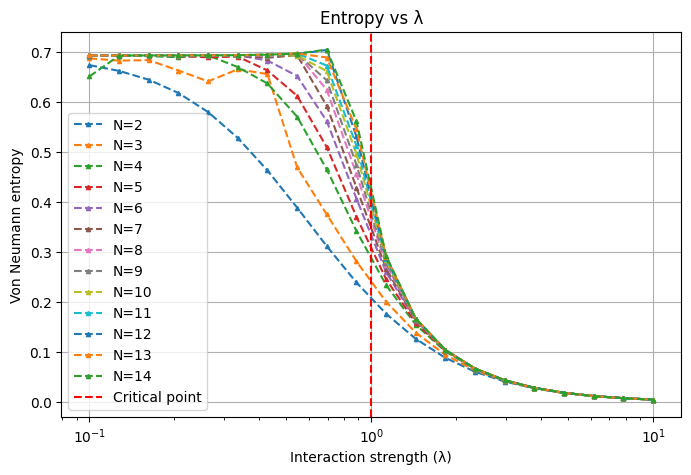

In [13]:
plot_entropy(N_vals, l_vals, eigenvectors)

In [14]:
def scaling_analysis_entropy(eigenvectors, N, l_values):
  """
  Performs a scaling analysis of entropy.

  Parameters
  ----------
  state_vector : np.ndarray
    The quantum state vector of the entire system, assumed to be normalized.
  N : int
    Number of spins in the system.

  Returns
  -------
  None
  """
  entropies = []

  for l in l_values:
    S_l = von_neumann_entropy(eigenvectors[(N, l)][0], len(eigenvectors[(N, l)][0]), 2, list(range(len(eigenvectors[(N, l)][0]) // 2)))
    entropies.append(S_l / N)

  scaling_function = lambda c, l: c / 3 * np.log(N / np.pi * np.sin(np.pi * l / N))

  from scipy.optimize import curve_fit
  
  entropies = np.array(entropies)
  popt, _ = curve_fit(scaling_function, l_values, entropies)
  c_fit = popt[0]

  # Plot results
  plt.figure(figsize=(8, 5))
  plt.plot(l_values, entropies, 'o', label="Data")
  plt.plot(l_values, scaling_function(c_fit, l_values), '--', label=f"Fit: c={c_fit:.2f}")

  plt.xlabel("Subsystem size l")
  plt.ylabel("Scaled Entropy S_l / N")
  plt.title("Scaling Analysis of Entropy")
  plt.legend()
  plt.grid()
  plt.show()

  print(f"Fitted central charge: c = {c_fit:.2f}")

In [15]:
scaling_analysis_entropy(eigenvectors, N_vals[-1], l_vals)

ValueError: maximum supported dimension for an ndarray is 32, found 16384

**Two-point correlation function**

In [ ]:
def two_point_correlation(psi, N, i, j):
    """
    Compute the two-point correlation function C_{i,j} = <psi|σ_z^i σ_z^j|psi>
    for a given quantum state.

    Parameters
    ----------
    psi : np.ndarray
        The ground state wavefunction of the system, represented as a complex vector of size 2^N.
    N : int
        Number of spins in the system.
    i : int
        Index of the first spin (0-based).
    j : int
        Index of the second spin (0-based).

    Returns
    -------
    correlation : float
        The two-point correlation function C_{i,j}.
    """
    import numpy as np
    from scipy.sparse import identity, kron
    from scipy.sparse.linalg import LinearOperator

    # Validate input indices
    if not (0 <= i < N and 0 <= j < N):
        raise ValueError(f"Indices i and j must be in range [0, N-1], got i={i}, j={j}.")
    
    # Pauli z matrix
    s_z = np.array([[1, 0], [0, -1]], dtype=complex)

    # Build the operator σ_z^i σ_z^j
    def kron_sparse(*ops):
        """Helper to compute the Kronecker product of a list of operators."""
        result = identity(1, format="csc")  # Start with the identity operator
        for op in ops:
            result = kron(result, op, format="csc")
        return result

    operators = [identity(2, format="csc")] * N  # Start with identity for all sites
    operators[i] = s_z
    operators[j] = s_z
    sz_sz_operator = kron_sparse(*operators)

    # Compute the expectation value <psi|σ_z^i σ_z^j|psi>
    psi_sparse = np.array(psi).reshape(-1, 1)
    correlation = np.real(np.dot(psi_sparse.conj().T, sz_sz_operator @ psi_sparse).item())

    return correlation
